### 1. Read and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
df_country = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
df_country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df_country.shape

(167, 10)

In [5]:
df_country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Step 2 : Data Cleansing

In [6]:
# missing values
round(100*(df_country.isnull().sum())/len(df_country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
# Checking for duplicates in the country column
country = df_country["country"]
df_country[country.isin(country[country.duplicated()])].sort_values("country")

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

None of the columns have null values hence no imputation or drop required.

In [8]:
# Datatype check for the dataframe

df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

None of the columns have inconsistent datatype, hence no conversion is required.

### Step 3 : Data Visualization


(9.0, 0.0)

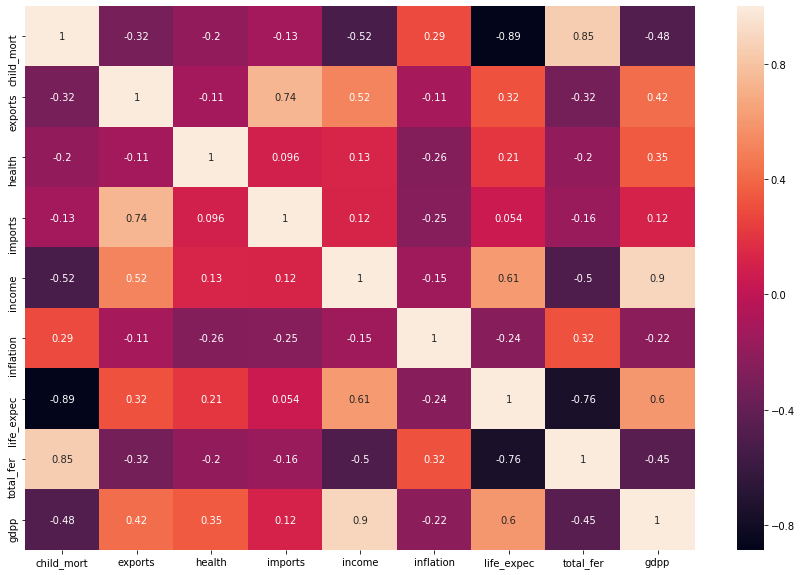

In [9]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(df_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


    1.child_mortality and life_expentency are highly correlated with correlation of -0.89
    2.child_mortality and total_fertility are highly correlated with correlation of 0.85
    3.imports and exports are highly correlated with correlation of 0.74
    4.life_expentency and total_fertility are highly correlated with correlation of -0.76


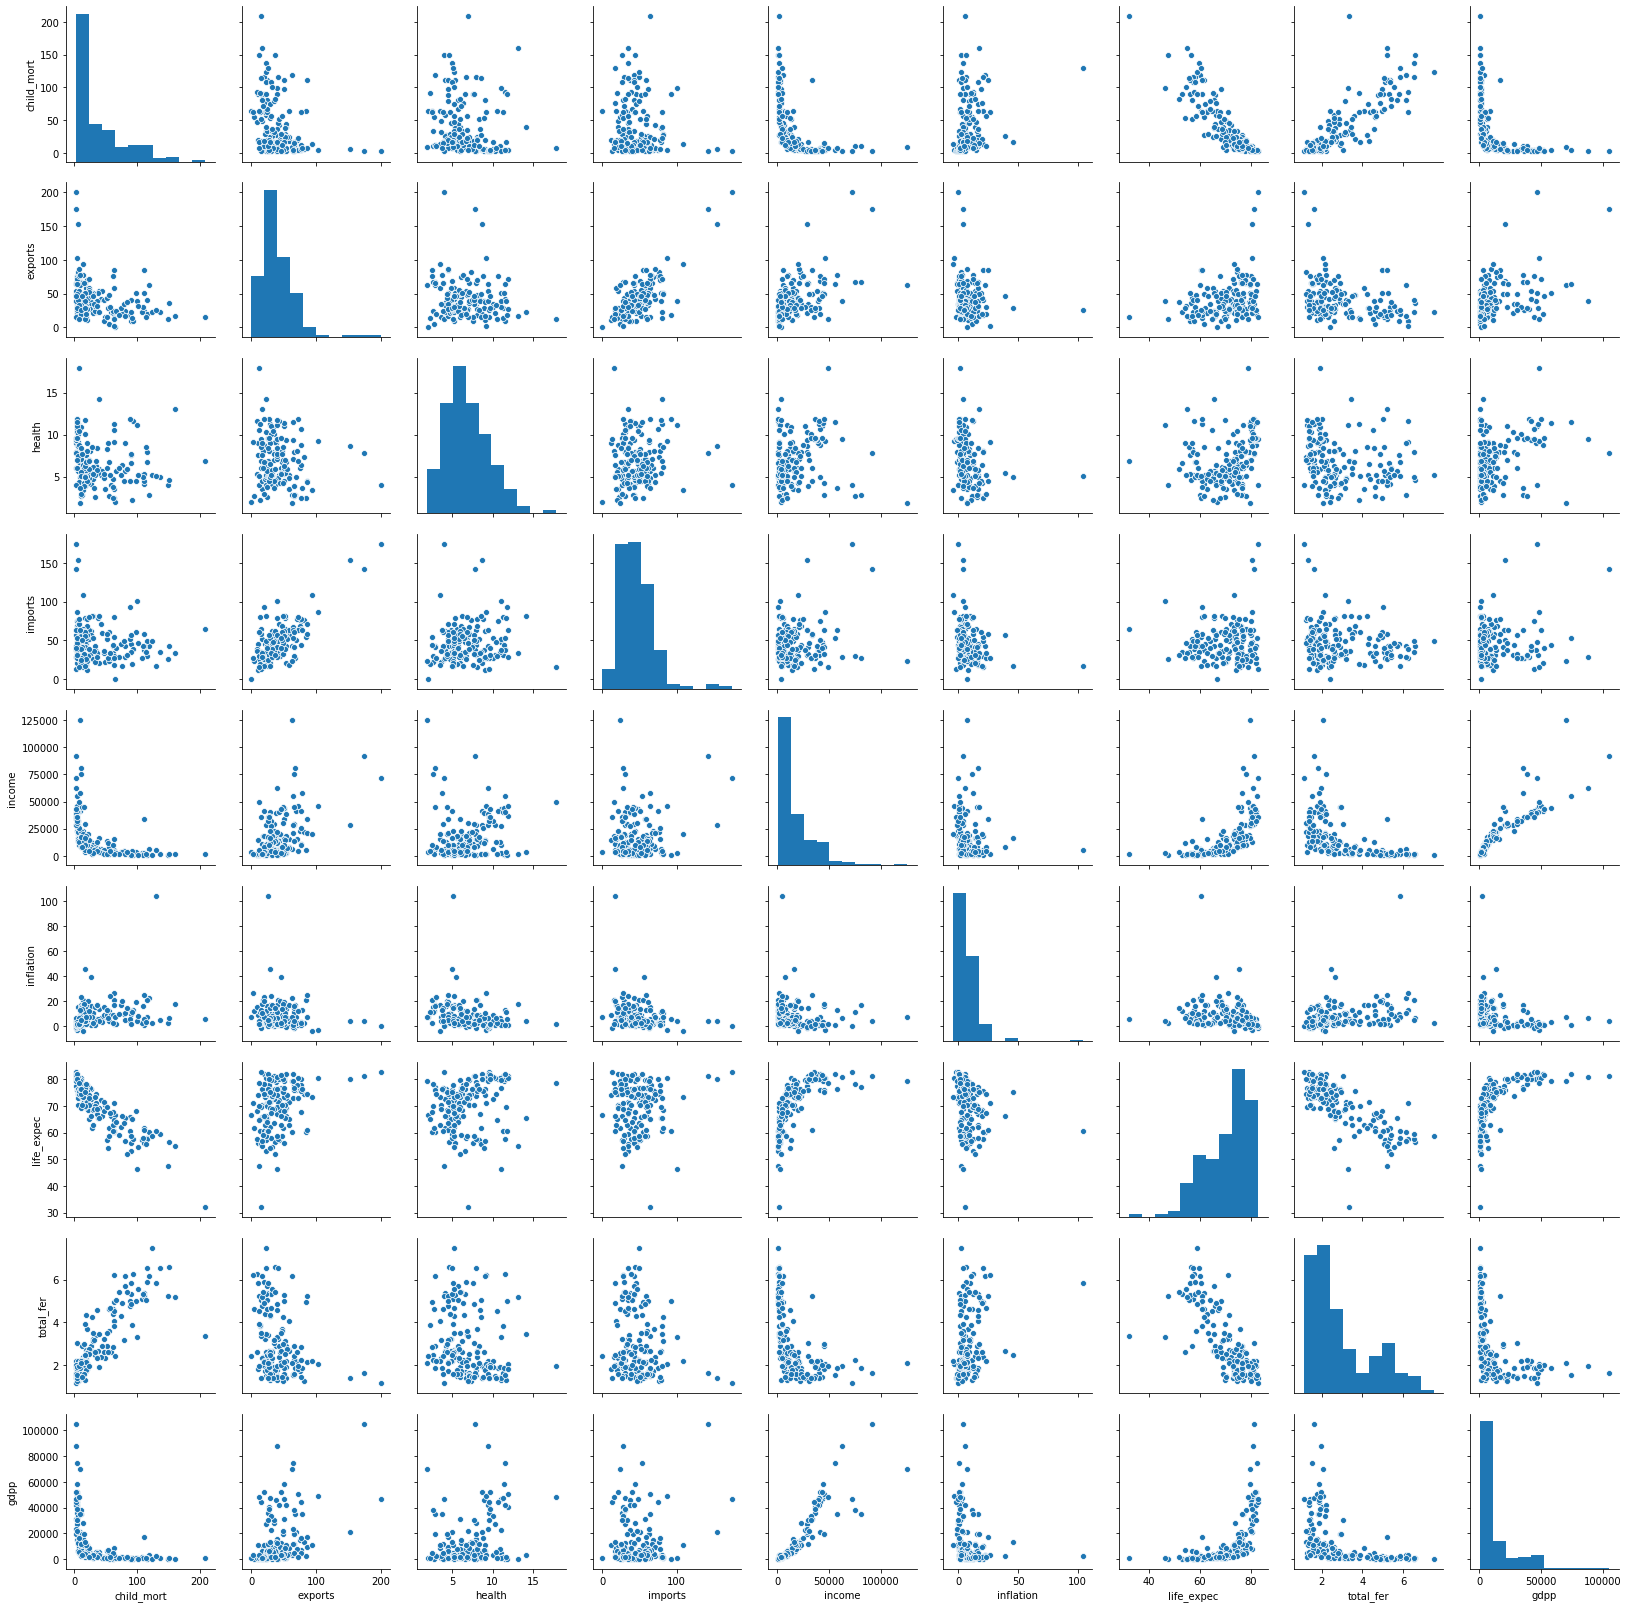

In [10]:
# Pairplot of all numeric columns

sns.pairplot(df_country)

##### Univariate Analysis


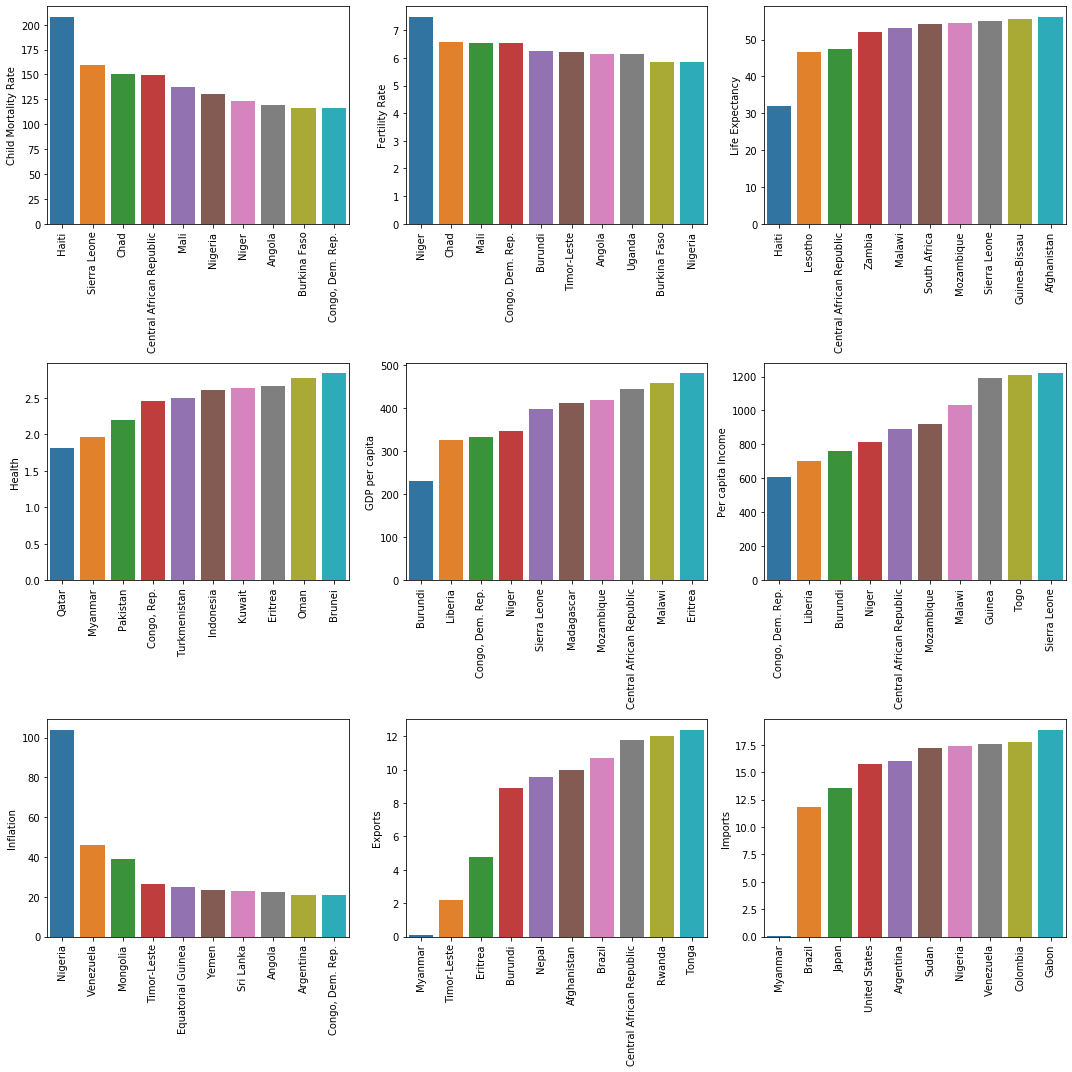

In [11]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
fig, axs = plt.subplots(3,3,figsize = (15,15))
top10_child_mort = df_country[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort,ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df_country[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df_country[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = df_country[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df_country[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = df_country[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df_country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = df_country[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')

# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = df_country[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

### Outlier Analysis

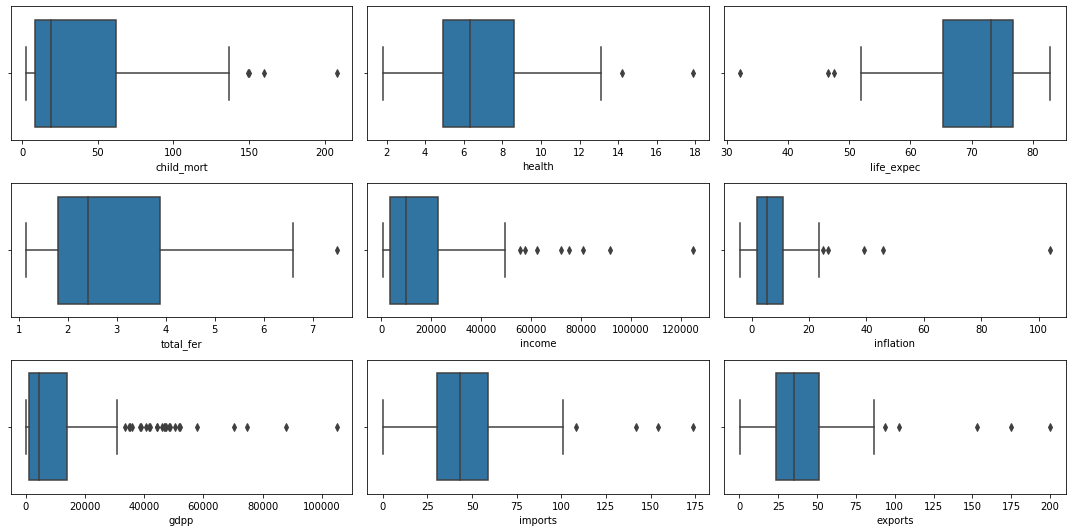

In [12]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_country['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df_country['health'], ax = axs[0,1])
plt3 = sns.boxplot(df_country['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df_country['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df_country['income'], ax = axs[1,1])
plt6 = sns.boxplot(df_country['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df_country['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df_country['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df_country['exports'], ax = axs[2,2])


plt.tight_layout()

In [13]:
# Before manipulating data, we will save one copy of orignal data.
df_country_help = df_country.copy()
df_country_help.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [14]:
percentiles = df_country_help['child_mort'].quantile([0.05,0.95]).values
df_country_help['child_mort'][df_country_help['child_mort'] <= percentiles[0]] = percentiles[0]
df_country_help['child_mort'][df_country_help['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['health'].quantile([0.05,0.95]).values
df_country_help['health'][df_country_help['health'] <= percentiles[0]] = percentiles[0]
df_country_help['health'][df_country_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['life_expec'].quantile([0.05,0.95]).values
df_country_help['life_expec'][df_country_help['life_expec'] <= percentiles[0]] = percentiles[0]
df_country_help['life_expec'][df_country_help['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['total_fer'].quantile([0.05,0.95]).values
df_country_help['total_fer'][df_country_help['total_fer'] <= percentiles[0]] = percentiles[0]
df_country_help['total_fer'][df_country_help['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['income'].quantile([0.05,0.95]).values
df_country_help['income'][df_country_help['income'] <= percentiles[0]] = percentiles[0]
df_country_help['income'][df_country_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['inflation'].quantile([0.05,0.95]).values
df_country_help['inflation'][df_country_help['inflation'] <= percentiles[0]] = percentiles[0]
df_country_help['inflation'][df_country_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['gdpp'].quantile([0.05,0.95]).values
df_country_help['gdpp'][df_country_help['gdpp'] <= percentiles[0]] = percentiles[0]
df_country_help['gdpp'][df_country_help['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['imports'].quantile([0.05,0.95]).values
df_country_help['imports'][df_country_help['imports'] <= percentiles[0]] = percentiles[0]
df_country_help['imports'][df_country_help['imports'] >= percentiles[1]] = percentiles[1]

percentiles = df_country_help['exports'].quantile([0.05,0.95]).values
df_country_help['exports'][df_country_help['exports'] <= percentiles[0]] = percentiles[0]
df_country_help['exports'][df_country_help['exports'] >= percentiles[1]] = percentiles[1]

C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anindita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\

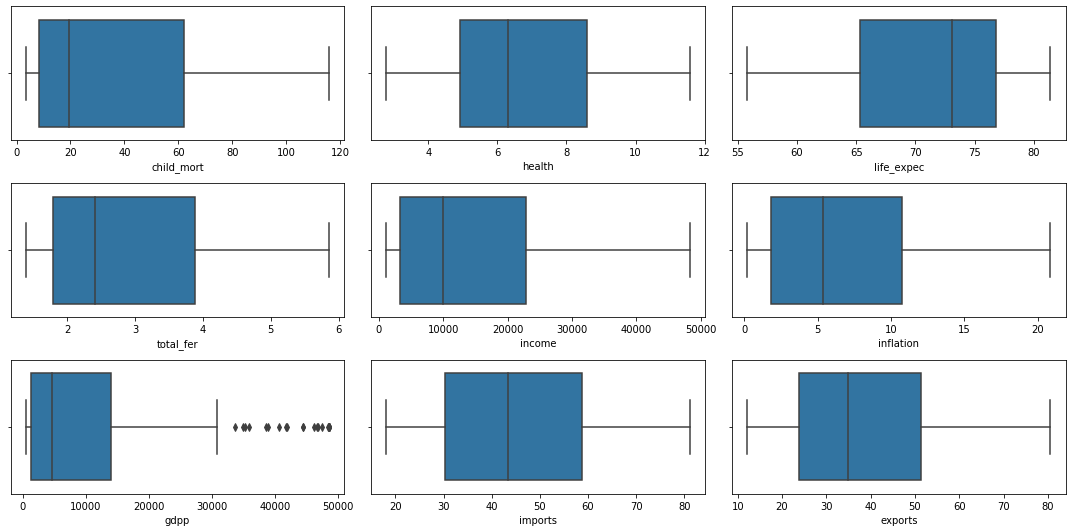

In [15]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(df_country_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df_country_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(df_country_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df_country_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df_country_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(df_country_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df_country_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df_country_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df_country_help['exports'], ax = axs[2,2])

plt.tight_layout()

#### Hopkins


In [16]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

### Scaling the data 

In [17]:
#Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
df_country_help_scaler = scaler.fit_transform(df_country_help[varlist])
df_country_help_scaler.shape

(167, 9)

In [18]:
df_country_help_scaler.shape

(167, 9)

In [19]:
df_country_help_scaler = pd.DataFrame(df_country_help_scaler)
#df_country_help_scaler = ['child_mort', 'gdpp', 'income']
hopkins(df_country_help_scaler)

0.740388444809079

Since the value is between 0.7 - 0.99, there is a high chance of clustering to be formed

#### Finding the Optimal Number of Clusters 

SSD

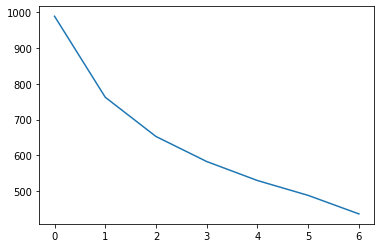

In [20]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_country_help_scaler)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis 

In [21]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_country_help_scaler)
    sse_.append([k, silhouette_score(df_country_help_scaler, kmeans.labels_)])

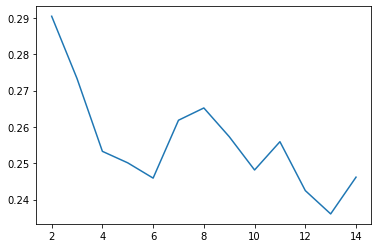

In [22]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [23]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_country_help_scaler)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_country_help_scaler, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2898029800333512
For n_clusters=3, the silhouette score is 0.2733301748359667
For n_clusters=4, the silhouette score is 0.25383480436241007
For n_clusters=5, the silhouette score is 0.250117988476282
For n_clusters=6, the silhouette score is 0.24364021565590763
For n_clusters=7, the silhouette score is 0.2636688914665054
For n_clusters=8, the silhouette score is 0.2442921294520979


In [24]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_country_help_scaler)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [26]:
# assign the label
df_country_help['cluster_id'] = kmeans.labels_
df_country_help.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    12.12    7.58     44.9   1610.0   
1              Albania        16.6    28.00    6.55     48.6   9930.0   
2              Algeria        27.3    38.40    4.17     31.4  12900.0   
3               Angola       116.0    62.30    2.85     42.9   5900.0   
4  Antigua and Barbuda        10.3    45.50    6.03     58.9  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id  
0       9.44        56.2      5.820    553.0           1  
1       4.49        76.3      1.650   4090.0           0  
2      16.10        76.5      2.890   4460.0           0  
3      20.87        60.1      5.861   3530.0           1  
4       1.44        76.8      2.130  12200.0           0

In [27]:
df_country_segment = df_country_help.groupby(['cluster_id']) # Write your code for grouping the dataframe here
df_country_segment

In [28]:
df_country_segment=df_country_segment['gdpp','child_mort','income'].mean().reset_index().sort_values(by=['gdpp','child_mort','income'],ascending=[True,True,True]).head()
df_country_segment

cluster_id          gdpp  child_mort        income
1           1   1859.550980   85.172549   3927.784314
0           0   6496.126582   20.322785  12639.746835
2           2  37745.675676    5.344324  38711.081081

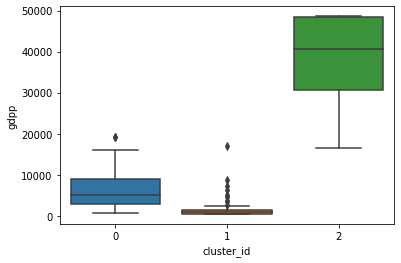

In [29]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=df_country_help)

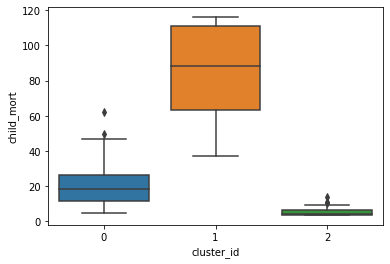

In [30]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=df_country_help)

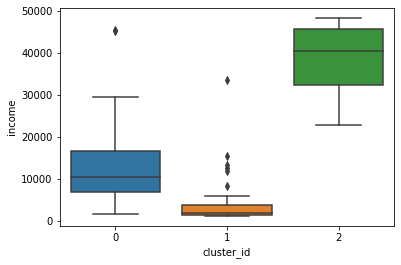

In [31]:
# plot
sns.boxplot(x='cluster_id', y='income', data=df_country_help)

### Scatter plot between actual variables and cluster id: 

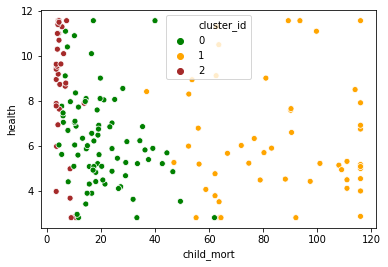

In [32]:
# scatterplot for child_mort, health and cluster Id
sns.scatterplot(x='child_mort',y='health',hue='cluster_id',legend='full',data=df_country_help,palette=['green','orange','brown'])

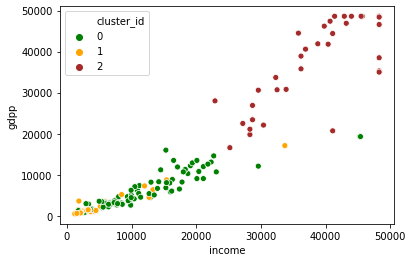

In [33]:
# scatterplot between income, gdpp and cluster ID
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=df_country_help,palette=['green','orange','brown'])

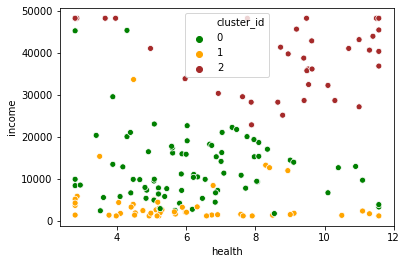

In [34]:
# scatterplot for health, income for different cluster id
sns.scatterplot(x='health',y='income',hue='cluster_id',legend='full',data=df_country_help,palette=['green','orange','brown'])

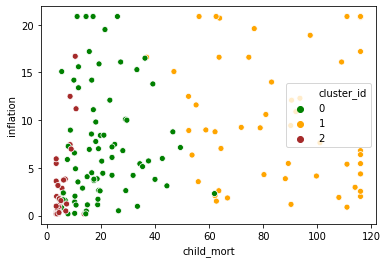

In [35]:
# scatterplot for infaltion, child mort for different cluster id
sns.scatterplot(y='inflation',x='child_mort',hue='cluster_id',legend='full',data=df_country_help,palette=['green','orange','brown'])

### Analysis of the clusters:

In [36]:
child_mort_mean = pd.DataFrame(df_country_help.groupby(["cluster_id"]).child_mort.mean())
income_mean = pd.DataFrame(df_country_help.groupby(["cluster_id"]).income.mean())
gdpp_mean = pd.DataFrame(df_country_help.groupby(["cluster_id"]).gdpp.mean())

In [37]:
country_analysis_df = pd.concat([pd.Series([0,1,2]),child_mort_mean,income_mean,gdpp_mean], axis=1)

In [38]:
country_analysis_df.columns = ["cluster_id","child_mort_mean","income_mean","gdpp_mean"]
country_analysis_df

cluster_id  child_mort_mean   income_mean     gdpp_mean
0           0        20.322785  12639.746835   6496.126582
1           1        85.172549   3927.784314   1859.550980
2           2         5.344324  38711.081081  37745.675676

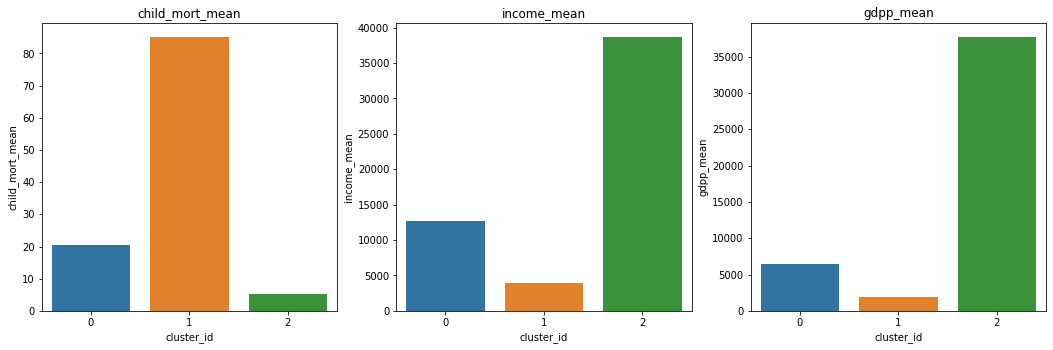

In [39]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.cluster_id, country_analysis_df.child_mort_mean)
# subplot 2
plt.subplot(3, 3, 2)
plt.title("income_mean")
sns.barplot(country_analysis_df.cluster_id, country_analysis_df.income_mean)
# subplot 3
plt.subplot(3, 3, 3)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.cluster_id, country_analysis_df.gdpp_mean)
plt.show()

Looking at the graph we are certain that cluster 1 is our cluster of concern. Because:

1. It has highest child mortality
2. Lowest income
3. Lowest gdpp.

In [40]:
df_country_cluster1 = df_country_help.loc[df_country_help['cluster_id'] == 1]
df_country_cluster1.head(10)

country  child_mort  exports  health  imports   income  \
0                Afghanistan        90.2    12.12    7.58     44.9   1610.0   
3                     Angola       116.0    62.30    2.85     42.9   5900.0   
17                     Benin       111.0    23.80    4.10     37.2   1820.0   
21                  Botswana        52.5    43.60    8.30     51.3  13300.0   
25              Burkina Faso       116.0    19.20    6.74     29.6   1430.0   
26                   Burundi        93.6    12.12   11.57     39.2   1213.0   
28                  Cameroon       108.0    22.20    5.13     27.0   2660.0   
31  Central African Republic       116.0    12.12    3.98     26.5   1213.0   
32                      Chad       116.0    36.80    4.53     43.5   1930.0   
36                   Comoros        88.2    16.50    4.51     51.7   1410.0   

    inflation  life_expec  total_fer    gdpp  cluster_id  
0       9.440       56.20      5.820   553.0           1  
3      20.870       60.10      5.861  3530.0           1  
17      0.885       61.80      5.360   758.0           1  
21      8.920       57.10      2.880  6350.0           1  
25      6.810       57.90      5.861   575.0           1  
26     12.300       57.70      5.861   465.9           1  
28      1.910       57.30      5.110  1310.0           1  
31      2.010       55.78      5.210   465.9           1  
32      6.390       56.50      5.861   897.0           1  
36      3.870       65.90      4.750   769.0           1

In [41]:
df_country_cluster1=df_country_cluster1.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True])
df_country_need_help=df_country_cluster1[['country','gdpp','child_mort','income']]
df_country_need_help.head(10)

country   gdpp  child_mort  income
31   Central African Republic  465.9       116.0  1213.0
37           Congo, Dem. Rep.  465.9       116.0  1213.0
112                     Niger  465.9       116.0  1213.0
132              Sierra Leone  465.9       116.0  1220.0
106                Mozambique  465.9       101.0  1213.0
26                    Burundi  465.9        93.6  1213.0
94                     Malawi  465.9        90.5  1213.0
88                    Liberia  465.9        89.3  1213.0
93                 Madagascar  465.9        62.2  1390.0
50                    Eritrea  482.0        55.2  1420.0

As per K- means clustering, the country which are direst need of aid are:

1. Central African Republic
2. Congo, Dem. Rep.
3. Niger	
4. Sierra Leone
5. Mozambique
6. Burundi
7. Malawi
8. Liberia
9. Madagascar	
10. Eritrea

#### Hierarchical Clustering 

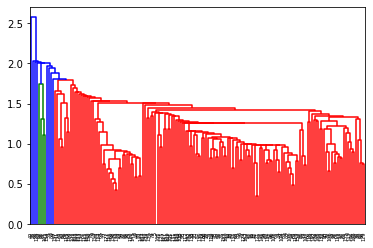

In [42]:
# single linkage
mergings = linkage(df_country_help_scaler, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

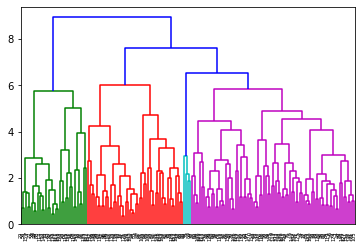

In [43]:
# complete linkage
mergings = linkage(df_country_help_scaler, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))

In [45]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0])

In [46]:
# assign cluster labels
df_country_help['cluster_labels'] = cluster_labels
df_country_help.head()

country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2    12.12    7.58     44.9   1610.0   
1              Albania        16.6    28.00    6.55     48.6   9930.0   
2              Algeria        27.3    38.40    4.17     31.4  12900.0   
3               Angola       116.0    62.30    2.85     42.9   5900.0   
4  Antigua and Barbuda        10.3    45.50    6.03     58.9  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id  cluster_labels  
0       9.44        56.2      5.820    553.0           1               0  
1       4.49        76.3      1.650   4090.0           0               0  
2      16.10        76.5      2.890   4460.0           0               0  
3      20.87        60.1      5.861   3530.0           1               0  
4       1.44        76.8      2.130  12200.0           0               1

### Scatterplots between original variables and cluster labels:

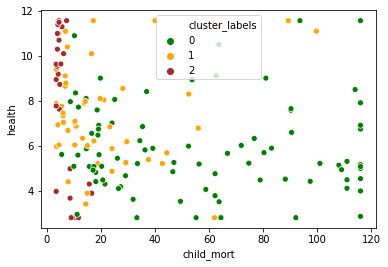

In [47]:
# scatterplot for child_mort, health and cluster Id
sns.scatterplot(x='child_mort',y='health',hue='cluster_labels',legend='full',data=df_country_help,palette=['green','orange','brown'])

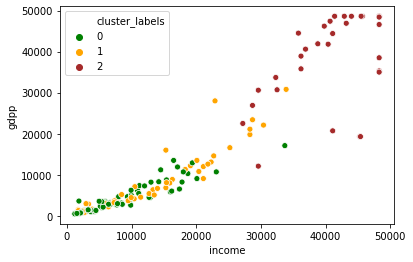

In [48]:
# scatterplot between income, gdpp and cluster ID
sns.scatterplot(x='income',y='gdpp',hue='cluster_labels',legend='full',data=df_country_help,palette=['green','orange','brown'])

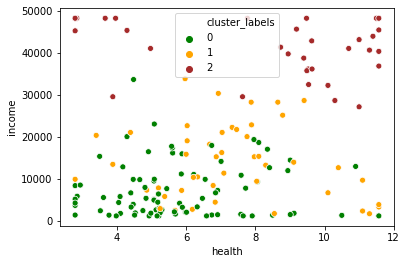

In [49]:
# scatterplot for health, income for different cluster id
sns.scatterplot(x='health',y='income',hue='cluster_labels',legend='full',data=df_country_help,palette=['green','orange','brown'])

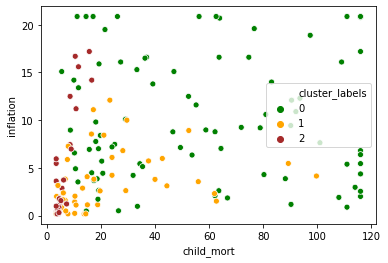

In [50]:
# scatterplot for infaltion, child mort for different cluster id
sns.scatterplot(y='inflation',x='child_mort',hue='cluster_labels',legend='full',data=df_country_help,palette=['green','orange','brown'])

In [51]:
child_mort_mean_hc = pd.DataFrame(df_country_help.groupby(["cluster_labels"]).child_mort.mean())
income_mean_hc = pd.DataFrame(df_country_help.groupby(["cluster_labels"]).income.mean())
gdpp_mean_hc = pd.DataFrame(df_country_help.groupby(["cluster_labels"]).gdpp.mean())

In [52]:
country_analysis_df_hc= pd.concat([pd.Series([0,1,2]),child_mort_mean_hc,income_mean_hc,gdpp_mean_hc], axis=1)

In [53]:
country_analysis_df_hc.columns = ["cluster_labels","child_mort_mean","income_mean","gdpp_mean"]
country_analysis_df_hc

cluster_labels  child_mort_mean   income_mean     gdpp_mean
0               0        56.636047   7226.209302   3591.967442
1               1        22.433750  13641.729167   8546.289583
2               2         6.046061  41057.878788  38954.242424

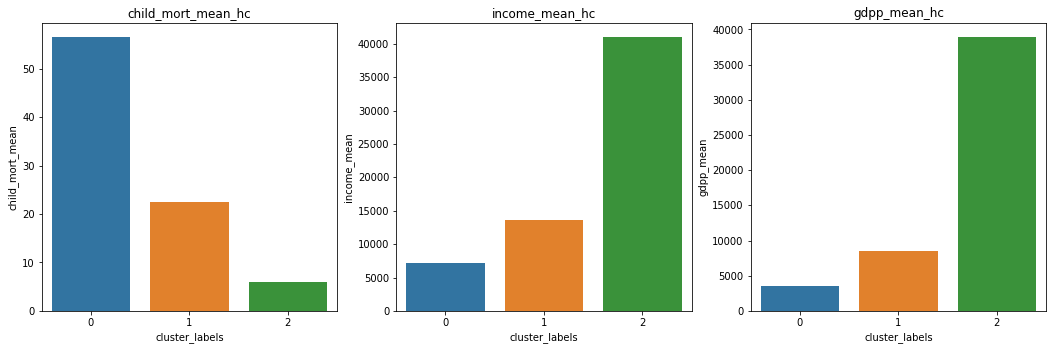

In [54]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean_hc")
sns.barplot(country_analysis_df_hc.cluster_labels, country_analysis_df_hc.child_mort_mean)
# subplot 2
plt.subplot(3, 3, 2)
plt.title("income_mean_hc")
sns.barplot(country_analysis_df_hc.cluster_labels, country_analysis_df_hc.income_mean)
# subplot 3
plt.subplot(3, 3, 3)
plt.title("gdpp_mean_hc")
sns.barplot(country_analysis_df_hc.cluster_labels, country_analysis_df_hc.gdpp_mean)
plt.show()

Looking at the graph we are certain that cluster 0 is our cluster of concern. Because:
1. It has highest child mortality
2. Lowest income
3. Which all in turn leads to lowest gdpp.

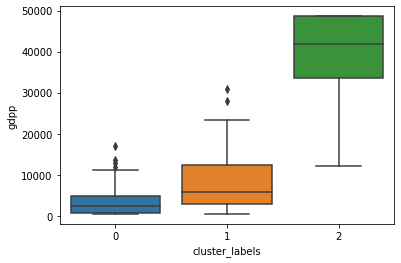

In [55]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df_country_help)

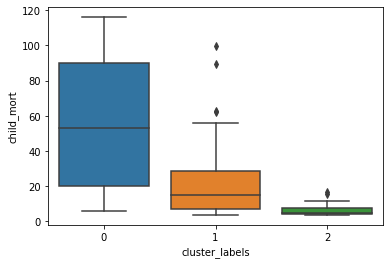

In [56]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df_country_help)

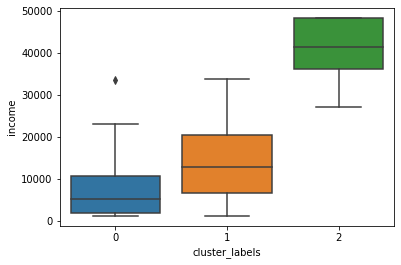

In [57]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=df_country_help)

In [58]:
df_country_clus0 = df_country_help.loc[df_country_help['cluster_labels'] == 0]
df_country_clus0.head(10)

country  child_mort  exports  health  imports   income  inflation  \
0   Afghanistan        90.2    12.12    7.58    44.90   1610.0      9.440   
1       Albania        16.6    28.00    6.55    48.60   9930.0      4.490   
2       Algeria        27.3    38.40    4.17    31.40  12900.0     16.100   
3        Angola       116.0    62.30    2.85    42.90   5900.0     20.870   
5     Argentina        14.5    18.90    8.10    18.13  18700.0     20.870   
6       Armenia        18.1    20.80    4.40    45.30   6700.0      7.770   
9    Azerbaijan        39.2    54.30    5.88    20.70  16000.0     13.800   
12   Bangladesh        49.4    16.00    3.52    21.80   2440.0      7.140   
14      Belarus         5.5    51.40    5.61    64.50  16200.0     15.100   
17        Benin       111.0    23.80    4.10    37.20   1820.0      0.885   

    life_expec  total_fer     gdpp  cluster_id  cluster_labels  
0         56.2      5.820    553.0           1               0  
1         76.3      1.650   4090.0           0               0  
2         76.5      2.890   4460.0           0               0  
3         60.1      5.861   3530.0           1               0  
5         75.8      2.370  10300.0           0               0  
6         73.3      1.690   3220.0           0               0  
9         69.1      1.920   5840.0           0               0  
12        70.4      2.330    758.0           0               0  
14        70.4      1.490   6030.0           0               0  
17        61.8      5.360    758.0           1               0

In [59]:
df_country_clus0.loc[df_country_clus0['child_mort'].idxmax()]

country           Angola
child_mort           116
exports             62.3
health              2.85
imports             42.9
income              5900
inflation          20.87
life_expec          60.1
total_fer          5.861
gdpp                3530
cluster_id             1
cluster_labels         0
Name: 3, dtype: object

In [60]:
df_country_clus0=df_country_clus0.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True])
df_country_need_help_hier=df_country_clus0[['country','gdpp','child_mort','income']]
df_country_need_help_hier.head(10)

country   gdpp  child_mort  income
31   Central African Republic  465.9       116.0  1213.0
37           Congo, Dem. Rep.  465.9       116.0  1213.0
112                     Niger  465.9       116.0  1213.0
132              Sierra Leone  465.9       116.0  1220.0
106                Mozambique  465.9       101.0  1213.0
26                    Burundi  465.9        93.6  1213.0
94                     Malawi  465.9        90.5  1213.0
93                 Madagascar  465.9        62.2  1390.0
50                    Eritrea  482.0        55.2  1420.0
150                      Togo  488.0        90.3  1213.0

As per Heirarchical Clustering, the countries which require aid are:

1. Central African Republic	
2. Congo, Dem. Rep.
3. Niger
4. Sierra Leone	
5. Mozambique
6. Burundi	
7. Malawi
8. Madagascar
9. Eritrea
10. Togo

We got same countries by both K-means and Heirarchical Clustering: Therefore following are the countries which are in direst need of aid by considering socio – economic factor into consideration:

1. Central African Republic
2. Congo, Dem. Rep.
3. Niger	
4. Sierra Leone
5. Mozambique
6. Burundi
7. Malawi
8. Liberia
9. Madagascar	
10. Eritrea